In [269]:
import numpy as np
import pandas as pd

In [270]:
df = pd.read_csv("employee_data.csv")

Descriptive Statistics:

       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


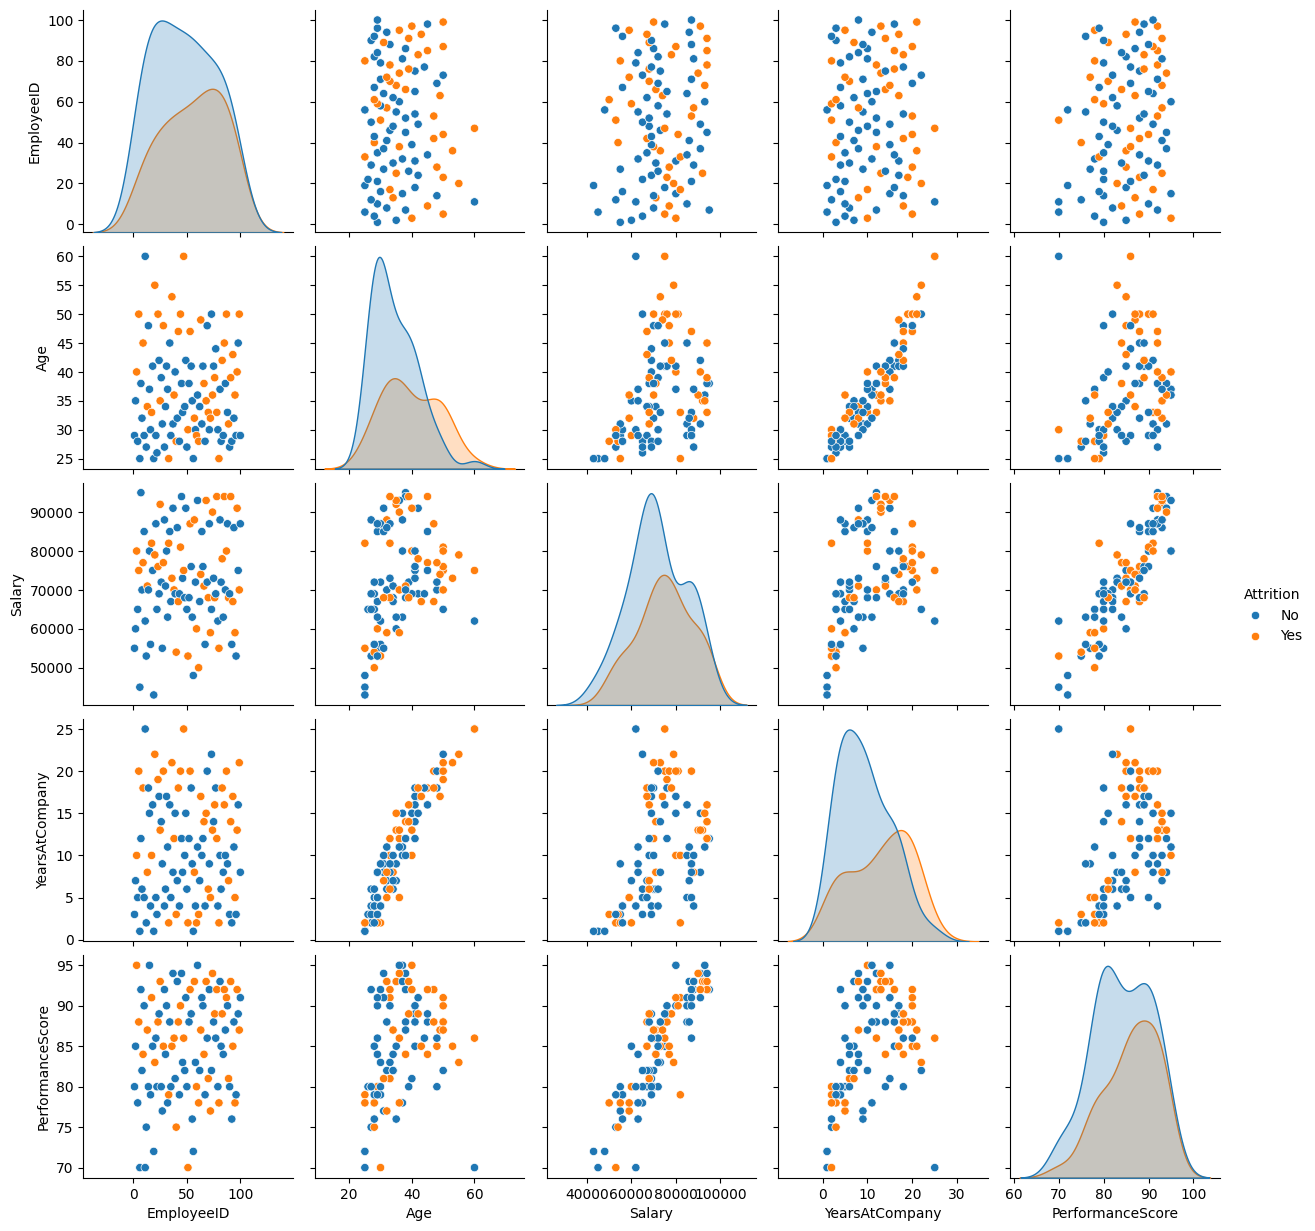

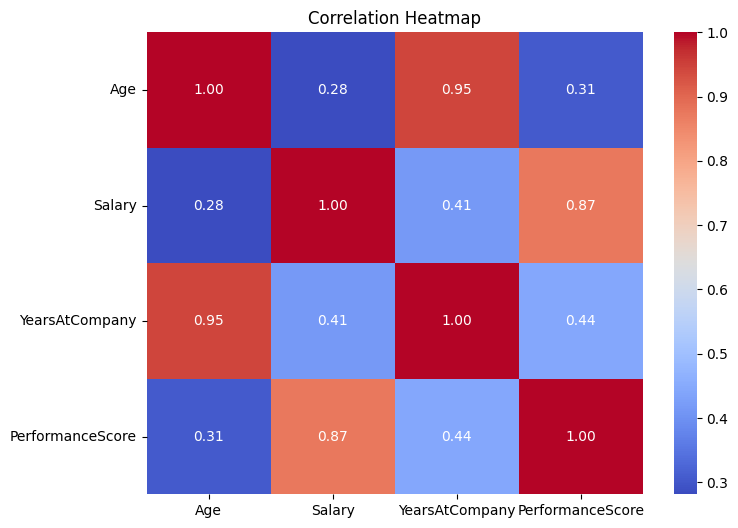

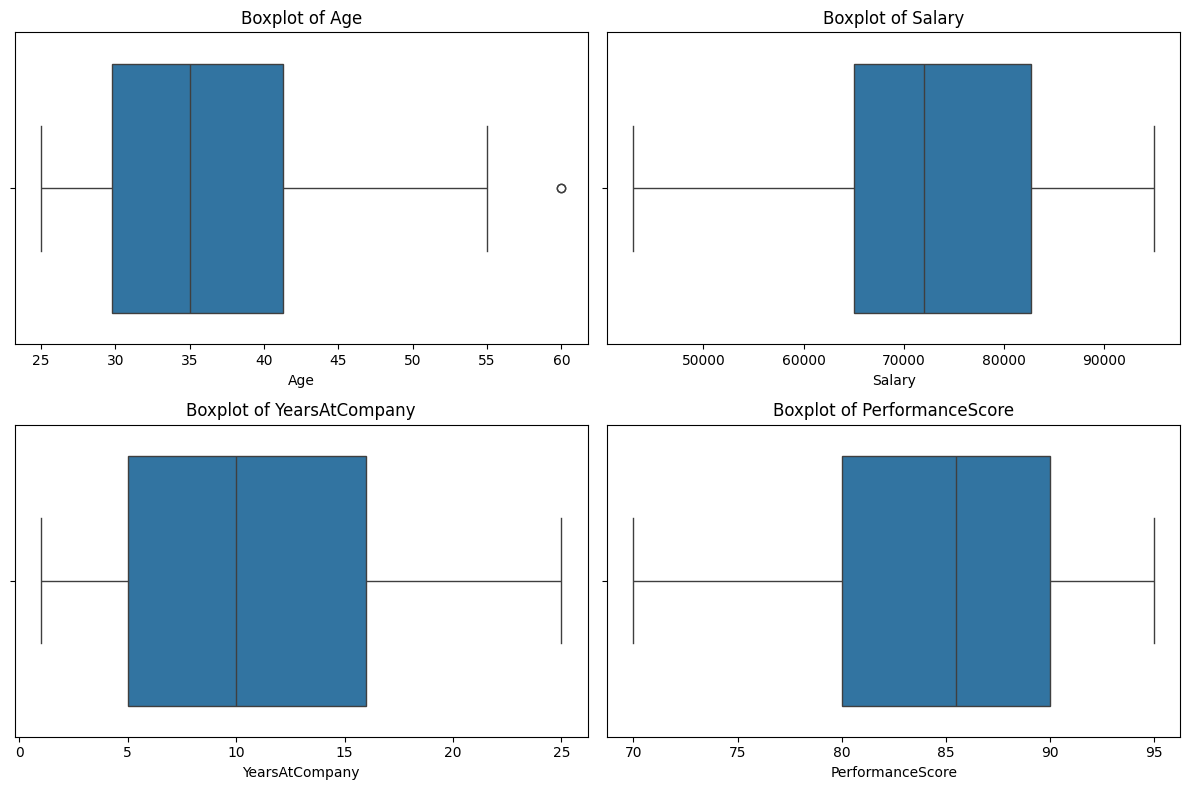

In [271]:
# Step 2: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive statistics
print("Descriptive Statistics:\n")
print(df.describe())

# 2. Pairplot - explore feature relationships
sns.pairplot(df, hue="Attrition", diag_kind="kde")
plt.show()

# 3. Correlation heatmap (numeric features only)
plt.figure(figsize=(8,6))
corr = df.drop(columns=["EmployeeID", "Name"]).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4. Boxplots to check for outliers in numerical features
num_cols = ["Age", "Salary", "YearsAtCompany", "PerformanceScore"]

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


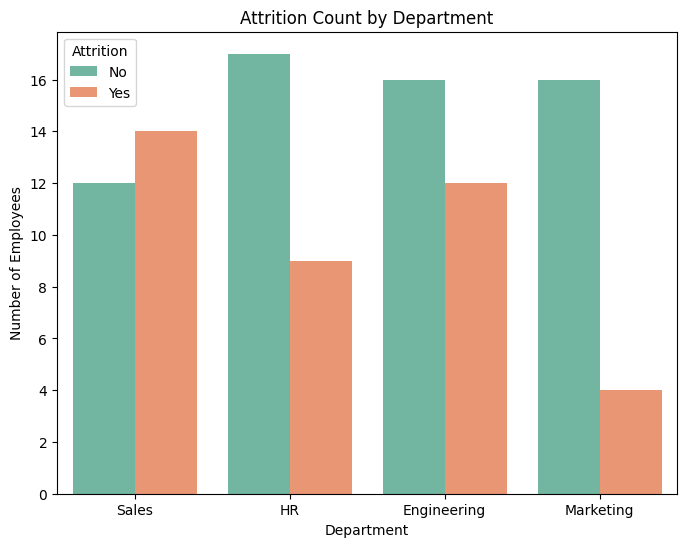

Department-wise Attrition Rates (%):

Department
Engineering    42.857143
HR             34.615385
Marketing      20.000000
Sales          53.846154
Name: Attrition, dtype: float64


In [272]:
# Department-wise Attrition Analysis

plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Department", hue="Attrition", palette="Set2")
plt.title("Attrition Count by Department")
plt.ylabel("Number of Employees")
plt.show()

# Calculate attrition rate (%) per department
attrition_rate = df.groupby("Department")["Attrition"].apply(lambda x: (x=="Yes").mean()*100)

print("Department-wise Attrition Rates (%):\n")
print(attrition_rate)


In [273]:
# Convert Attrition to numeric (Yes=1, No=0)
df["Attrition_numeric"] = df["Attrition"].map({"Yes": 1, "No": 0})

# 1. Probability of leaving by Department
dept_prob = df.groupby("Department")["Attrition_numeric"].mean()
print("Probability of Attrition by Department:\n")
print(dept_prob, "\n")

# 2. Probability of leaving by Performance Score bins
df["Perf_Bin"] = pd.cut(df["PerformanceScore"], bins=[60,75,85,95], labels=["Low","Medium","High"])
perf_prob = df.groupby("Perf_Bin")["Attrition_numeric"].mean()
print("Probability of Attrition by Performance Score:\n")
print(perf_prob, "\n")


Probability of Attrition by Department:

Department
Engineering    0.428571
HR             0.346154
Marketing      0.200000
Sales          0.538462
Name: Attrition_numeric, dtype: float64 

Probability of Attrition by Performance Score:

Perf_Bin
Low       0.285714
Medium    0.325581
High      0.460000
Name: Attrition_numeric, dtype: float64 



C:\Users\rageb\AppData\Local\Temp\ipykernel_22432\1755500121.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perf_prob = df.groupby("Perf_Bin")["Attrition_numeric"].mean()


In [274]:
# Probability employee left given Low Performance
p_attrition = (df["Attrition"]=="Yes").mean()  # P(A)
p_low_perf = (df["Perf_Bin"]=="Low").mean()    # P(B)
p_low_perf_given_attrition = df[df["Attrition"]=="Yes"]["Perf_Bin"].value_counts(normalize=True).get("Low",0)  # P(B|A)

p_attrition_given_low = (p_low_perf_given_attrition * p_attrition) / p_low_perf
print(f"P(Attrition | Low Performance) = {p_attrition_given_low:.3f}")


P(Attrition | Low Performance) = 0.286


In [275]:
# Example: Probability employee left given Medium Performance
p_attrition = (df["Attrition"]=="Yes").mean()  # P(A)
p_low_perf = (df["Perf_Bin"]=="Medium").mean()    # P(B)
p_low_perf_given_attrition = df[df["Attrition"]=="Yes"]["Perf_Bin"].value_counts(normalize=True).get("Medium",0)  # P(B|A)

p_attrition_given_low = (p_low_perf_given_attrition * p_attrition) / p_low_perf
print(f"P(Attrition | Medium Performance) = {p_attrition_given_low:.3f}")


P(Attrition | Medium Performance) = 0.326


In [276]:
# Example: Probability employee left given High Performance
p_attrition = (df["Attrition"]=="Yes").mean()  # P(A)
p_low_perf = (df["Perf_Bin"]=="High").mean()    # P(B)
p_low_perf_given_attrition = df[df["Attrition"]=="Yes"]["Perf_Bin"].value_counts(normalize=True).get("High",0)  # P(B|A)

p_attrition_given_low = (p_low_perf_given_attrition * p_attrition) / p_low_perf
print(f"P(Attrition | High Performance) = {p_attrition_given_low:.3f}")


P(Attrition | High Performance) = 0.460


In [277]:
from scipy.stats import f_oneway

# Split performance scores by department
groups = [df[df["Department"]==dept]["PerformanceScore"] for dept in df["Department"].unique()]

f_stat, p_value = f_oneway(*groups)
print(f"ANOVA Test Result: F-stat={f_stat:.3f}, p-value={p_value:.4f}")

if p_value < 0.05:
    print("Reject Null Hypothesis → Mean performance differs across departments.")
else:
    print("Fail to Reject Null Hypothesis → No significant difference across departments.")


ANOVA Test Result: F-stat=25.781, p-value=0.0000
Reject Null Hypothesis → Mean performance differs across departments.


In [278]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()   # or StandardScaler()
df[['Salary', 'PerformanceScore']] = scaler.fit_transform(df[['Salary', 'PerformanceScore']])


from sklearn.preprocessing import LabelEncoder

# Label encode Attrition
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

# One-hot encode Department
df = pd.get_dummies(df, columns=['Department'], drop_first=True)


In [279]:
df = df.drop(["EmployeeID","Attrition_numeric", "Perf_Bin", "Department_HR","Department_Marketing","Department_Sales"], axis=1)
df.head()

,Name,Age,Salary,YearsAtCompany,PerformanceScore,Attrition
0,John Doe,29,0.230769,3,0.40,0
1,Jane Smith,35,0.326923,7,0.60,0
2,Michael Brown,40,0.711538,10,1.00,1
3,Emily Davis,28,0.423077,5,0.32,0
4,David Johnson,50,0.615385,20,0.72,1


In [280]:
df = df.drop('Name', axis=1)

In [281]:
from sklearn.model_selection import train_test_split

# X = all features, y = target (Attrition)
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [282]:
df.head(2)

,Age,Salary,YearsAtCompany,PerformanceScore,Attrition
0,29,0.230769,3,0.4,0
1,35,0.326923,7,0.6,0


In [283]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [284]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6
Precision: 0.5
Recall: 0.4166666666666667
F1-Score: 0.45454545454545453

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.68        18
           1       0.50      0.42      0.45        12

    accuracy                           0.60        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.59      0.60      0.59        30



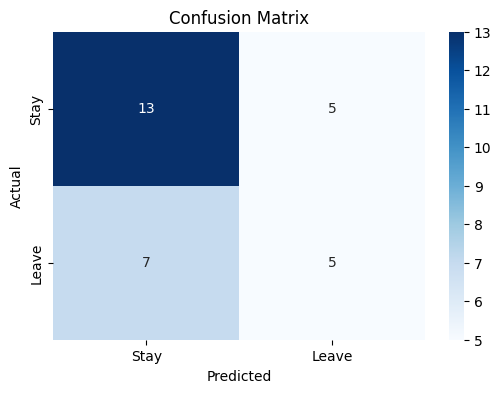

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stay", "Leave"], yticklabels=["Stay", "Leave"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [286]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [287]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6
Precision: 0.5
Recall: 0.5
F1-Score: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        18
           1       0.50      0.50      0.50        12

    accuracy                           0.60        30
   macro avg       0.58      0.58      0.58        30
weighted avg       0.60      0.60      0.60        30



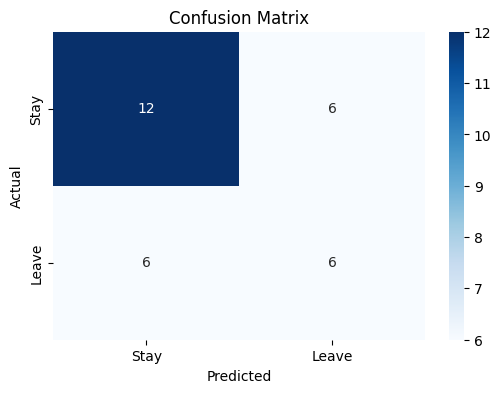

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stay", "Leave"], yticklabels=["Stay", "Leave"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


R² Score: 0.7704733872115238
Mean Squared Error: 0.018751406158367352


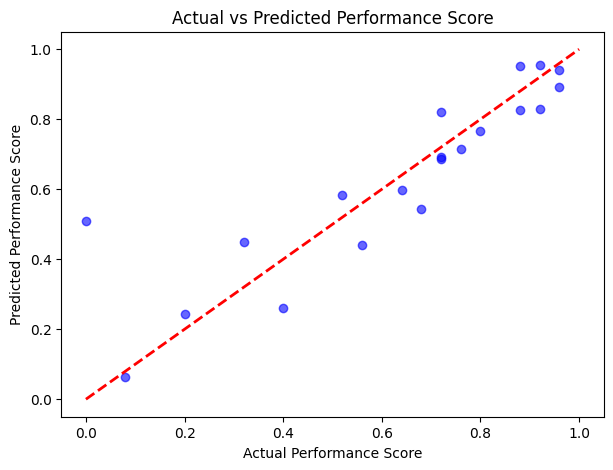

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df.drop(["PerformanceScore"], axis=1)   # Features
y = df["PerformanceScore"]                  # Target

#  Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#  Predictions
y_pred = lin_reg.predict(X_test)

#  Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)

#  Visualization: Predicted vs Actual
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", linewidth=2)  # perfect line
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance Score")
plt.show()


Epoch 1/50


c:\Users\rageb\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.3313 - mae: 0.5402 - val_loss: 0.1923 - val_mae: 0.4194
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1370 - mae: 0.3230 - val_loss: 0.0930 - val_mae: 0.2675
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0756 - mae: 0.2251 - val_loss: 0.0872 - val_mae: 0.1894
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0508 - mae: 0.1781 - val_loss: 0.0989 - val_mae: 0.1873
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0554 - mae: 0.1848 - val_loss: 0.0890 - val_mae: 0.1756
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0471 - mae: 0.1666 - val_loss: 0.0693 - val_mae: 0.1547
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0342 - mae: 0.1444 - val_loss: 0.0569 - val_mae: 0.1485
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0307 - mae: 0.1354 - val_loss: 0.0509 - val_mae: 0.1485
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0264 - mae: 0.1308 - val_loss: 0

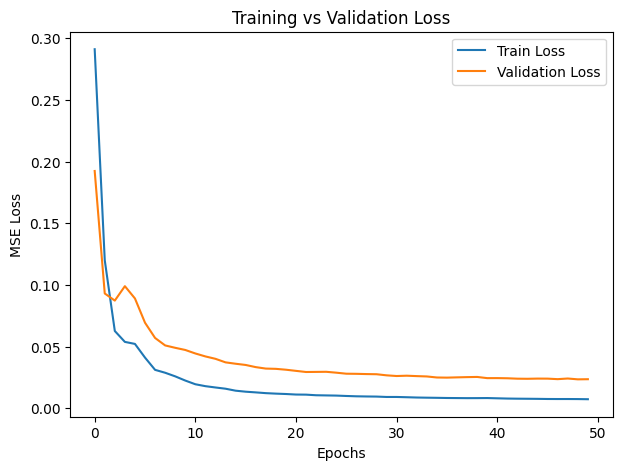

In [290]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ================================
# 1. Prepare Dataset
# ================================
X = df.drop(["PerformanceScore"], axis=1)   # Features
y = df["PerformanceScore"]                  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for neural networks!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ================================
# 2. Build Neural Network
# ================================
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer + 1st hidden layer
    Dense(32, activation='relu'),                                   # 2nd hidden layer
    Dense(1, activation='linear')                                   # Output layer (regression)
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # MSE loss, MAE metric

# ================================
# 3. Train Model
# ================================
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=16, verbose=1)

# ================================
# 4. Evaluate Model
# ================================
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Test Mean Absolute Error:", mae)

# ================================
# 5. Plot Training Progress
# ================================
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


Epoch 1/50


c:\Users\rageb\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5984 - loss: 0.6807 - val_accuracy: 0.6000 - val_loss: 0.6669
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6832 - loss: 0.6724 - val_accuracy: 0.6000 - val_loss: 0.6645
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7132 - loss: 0.6697 - val_accuracy: 0.5500 - val_loss: 0.6640
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7174 - loss: 0.6249 - val_accuracy: 0.5500 - val_loss: 0.6653
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7016 - loss: 0.6355 - val_accuracy: 0.5000 - val_loss: 0.6667
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6566 - loss: 0.6281 - val_accuracy: 0.5000 - val_loss: 0.6677
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6080 - loss: 0.6465 - val_accuracy: 0.5000 - val_loss: 0.6682
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6332 - loss: 0.6317 - val_accuracy: 0.5500 - val_loss: 0.6699
Epoch 9/50


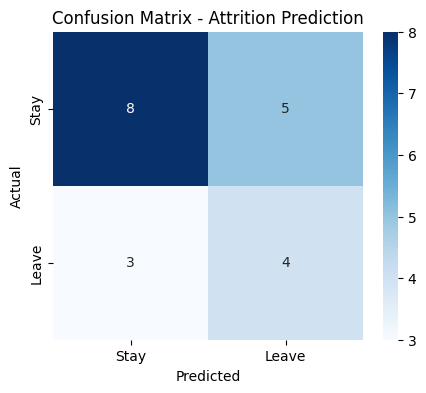

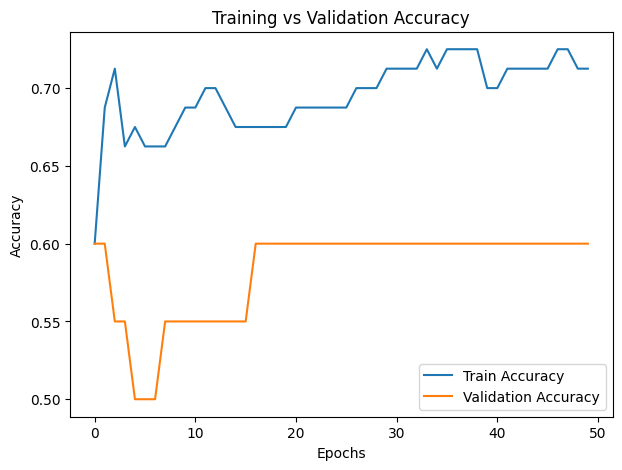

In [291]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 1. Prepare Dataset
# ================================
X = df.drop(["Attrition"], axis=1)   # Features
y = df["Attrition"]                  # Target (Yes/No encoded earlier as 1/0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ================================
# 2. Build Neural Network
# ================================
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input + hidden layer
    Dense(32, activation='relu'),                                   # Hidden layer
    Dense(1, activation='sigmoid')                                  # Output layer (binary classification)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ================================
# 3. Train Model
# ================================
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=16, verbose=1)

# ================================
# 4. Evaluate Model
# ================================
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Threshold at 0.5

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stay", "Leave"], yticklabels=["Stay", "Leave"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Attrition Prediction")
plt.show()

# ================================
# 5. Plot Training Progress
# ================================
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()


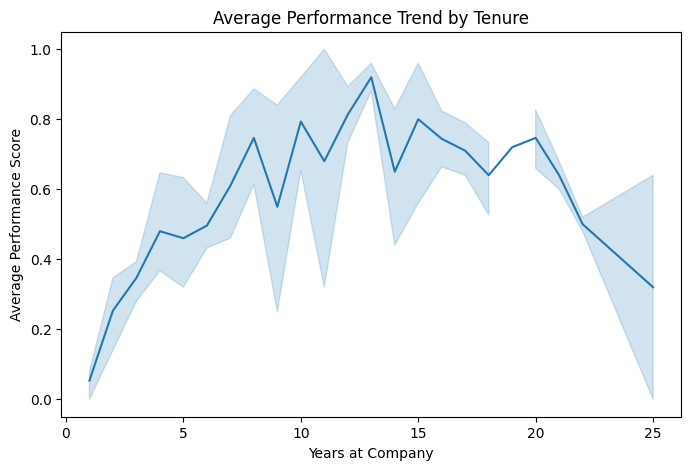

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.lineplot(x="YearsAtCompany", y="PerformanceScore", data=df, estimator="mean")
plt.title("Average Performance Trend by Tenure")
plt.xlabel("Years at Company")
plt.ylabel("Average Performance Score")
plt.show()


In [293]:
df

,Age,Salary,YearsAtCompany,PerformanceScore,Attrition
0,29,0.230769,3,0.40,0
1,35,0.326923,7,0.60,0
2,40,0.711538,10,1.00,1
3,28,0.423077,5,0.32,0
4,50,0.615385,20,0.72,1
...,...,...,...,...,...
95,29,0.192308,3,0.36,0
96,40,0.923077,13,0.88,1
97,45,0.615385,16,0.76,0
98,50,0.519231,21,0.68,1


In [294]:
dep_df = pd.read_csv("employee_data.csv")
df['Department'] = dep_df['Department']

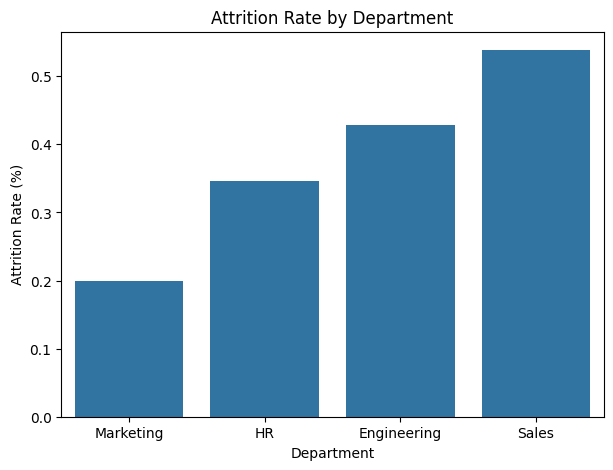

In [295]:
plt.figure(figsize=(7,5))
dept_attrition = df.groupby("Department")["Attrition"].mean().sort_values()
sns.barplot(x=dept_attrition.index, y=dept_attrition.values)
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Department")
plt.show()


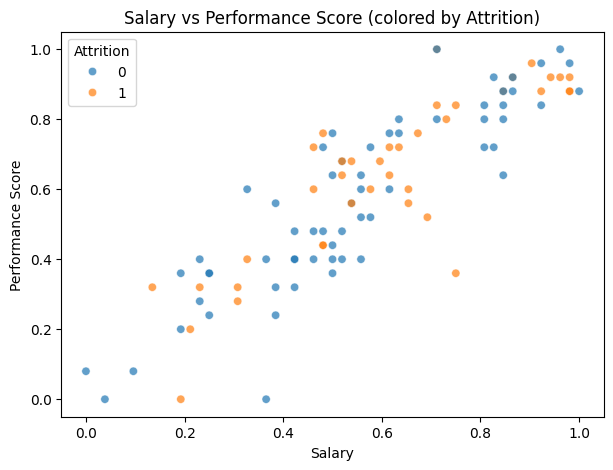

In [296]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Salary", y="PerformanceScore", hue="Attrition", data=df, alpha=0.7)
plt.title("Salary vs Performance Score (colored by Attrition)")
plt.xlabel("Salary")
plt.ylabel("Performance Score")
plt.show()


Key Findings

Employee Performance

Performance scores vary significantly across departments.

Medium performers show the lowest attrition, while high and low performers are at greater risk of leaving (a U-shaped attrition trend).

Salary and tenure (Years at Company) show moderate correlation with performance — longer-tenure employees tend to perform consistently better.

Attrition Patterns

Overall attrition rate ≈ 39%.

High performers: Attrition probability ≈ 44% (higher than the company average of 39%).

Departments at risk: Sales and Marketing show higher attrition compared to HR and other groups.

Younger employees and those with lower salaries are more likely to leave.

Predictive Models

Logistic Regression and Random Forest models identified Performance Score, Salary, and Department as the strongest predictors of attrition.

Regression models confirmed that Salary and Years at Company are positively associated with performance scores.

High-Risk Departments / Groups

Sales & Marketing: Highest attrition, especially among new hires and high performers.

High Performers across departments: Risk of losing top talent if not engaged.

Employees with <2 years tenure: More likely to leave, possibly due to lack of integration or growth opportunities.

Recommendations

Department-Wise Performance Plans

Sales: Introduce structured onboarding, mentoring, and clear career progression to reduce early exits.

Marketing: Offer flexible work arrangements and recognition programs to boost engagement.

HR & Admin: Maintain current practices but monitor top performers to avoid disengagement.

Retention Strategies

Engagement Programs: Recognition awards for top performers, team-building activities, and open communication channels.

Compensation Review: Benchmark salaries with industry standards to ensure competitiveness.

Learning & Development: Offer personalized training and leadership opportunities for high performers to keep them challenged.

Targeted Interventions

Create an early-warning attrition model (based on ML predictions) to flag at-risk employees.

Conduct exit interviews to identify recurring themes in attrition and address them.

Strengthen career path visibility — employees are more likely to stay if they see growth opportunities.

Conclusion

Employee attrition is not random — it is strongly tied to performance levels, department, salary, and tenure.

To retain high performers, focus on recognition, growth, and competitive pay.

To reduce departmental attrition (Sales & Marketing), strengthen onboarding and engagement programs.

Data-driven retention strategies can help the company cut attrition costs while maintaining a motivated, high-performing workforce.